In [47]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import scale

In [89]:
Survival = pd.read_csv(r"D:\Old Backup\morde\d\Bhupendra Assignments and Projects and Software Sem 4\SSDI\Hepatitis.csv",na_values='?')
Survival

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [49]:
Survival.isna().sum()

Class               0
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver_big          10
Liver_firm         11
Spleen_palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk_phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64

In [50]:
Survival.nunique()

Class               2
Age                49
Sex                 2
Steroid             2
Antivirals          2
Fatigue             2
Malaise             2
Anorexia            2
Liver_big           2
Liver_firm          2
Spleen_palpable     2
Spiders             2
Ascites             2
Varices             2
Bilirubin          34
Alk_phosphate      83
Sgot               84
Albumin            29
Protime            44
Histology           2
dtype: int64

In [51]:
mode_value = Survival['Steroid'].mode()[0]
Survival['Steroid']=Survival['Steroid'].fillna(value = mode_value)

In [52]:
mode_value = Survival['Fatigue'].mode()[0]
Survival['Fatigue']=Survival['Fatigue'].fillna(value = mode_value)

In [53]:
mode_value = Survival['Malaise'].mode()[0]
Survival['Malaise']=Survival['Malaise'].fillna(value = mode_value)

In [54]:
mode_value = Survival['Anorexia'].mode()[0]
Survival['Anorexia']=Survival['Anorexia'].fillna(value = mode_value)

In [55]:
mode_value = Survival['Liver_big'].mode()[0]
Survival['Liver_big']=Survival['Liver_big'].fillna(value = mode_value)

In [56]:
mode_value = Survival['Liver_firm'].mode()[0]
Survival['Liver_firm']=Survival['Liver_firm'].fillna(value = mode_value)

In [57]:
mode_value = Survival['Spleen_palpable'].mode()[0]
Survival['Spleen_palpable']=Survival['Spleen_palpable'].fillna(value = mode_value)

In [58]:
mode_value = Survival['Spiders'].mode()[0]
Survival['Spiders']=Survival['Spiders'].fillna(value = mode_value)

In [59]:
mode_value = Survival['Ascites'].mode()[0]
Survival['Ascites']=Survival['Ascites'].fillna(value = mode_value)

In [60]:
mode_value = Survival['Varices'].mode()[0]
Survival['Varices']=Survival['Varices'].fillna(value = mode_value)

In [61]:
mean_value = Survival['Bilirubin'].mean()
Survival['Bilirubin'].fillna(value=mean_value,inplace=True)

In [62]:
mean_value = Survival['Alk_phosphate'].mean()
Survival['Alk_phosphate'].fillna(value=mean_value,inplace=True)

In [63]:
mean_value = Survival['Sgot'].mean()
Survival['Sgot'].fillna(value=mean_value,inplace=True)

In [64]:
mean_value = Survival['Albumin'].mean()
Survival['Albumin'].fillna(value=mean_value,inplace=True)

In [65]:
mean_value = Survival['Protime'].mean()
Survival['Protime'].fillna(value=mean_value,inplace=True)

In [66]:
Survival.isna().sum()

Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver_big          0
Liver_firm         0
Spleen_palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk_phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
dtype: int64

In [67]:
Survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    float64
 6   Malaise          155 non-null    float64
 7   Anorexia         155 non-null    float64
 8   Liver_big        155 non-null    float64
 9   Liver_firm       155 non-null    float64
 10  Spleen_palpable  155 non-null    float64
 11  Spiders          155 non-null    float64
 12  Ascites          155 non-null    float64
 13  Varices          155 non-null    float64
 14  Bilirubin        155 non-null    float64
 15  Alk_phosphate    155 non-null    float64
 16  Sgot             155 non-null    float64
 17  Albumin         

In [68]:
Survival['Malaise'] = Survival.Malaise.astype(int)
Survival['Anorexia'] = Survival.Anorexia.astype(int)
Survival['Liver_firm'] = Survival.Liver_firm.astype(int)
Survival['Spiders'] = Survival.Spiders.astype(int)
Survival['Sex'] = Survival.Sex.astype(str)
Survival['Steroid'] = Survival.Steroid.astype(str)
Survival['Antivirals'] = Survival.Antivirals.astype(str)
Survival['Fatigue'] = Survival.Fatigue.astype(str)
Survival['Malaise'] = Survival.Malaise.astype(str)
Survival['Anorexia'] = Survival.Anorexia.astype(str)
Survival['Liver_big'] = Survival.Liver_big.astype(str)
Survival['Liver_firm'] = Survival.Liver_firm.astype(str)
Survival['Spleen_palpable'] = Survival.Spleen_palpable.astype(str)
Survival['Spiders'] = Survival.Spiders.astype(str)
Survival['Ascites'] = Survival.Ascites.astype(str)
Survival['Varices'] = Survival.Varices.astype(str)
Survival['Histology'] = Survival.Histology.astype(str)

In [91]:
Survival['Histology'] = Survival.Histology.astype("str")
Survival.iloc[:,-1]

0      1
1      1
2      1
3      1
4      1
      ..
150    2
151    2
152    2
153    2
154    2
Name: Histology, Length: 155, dtype: object

In [69]:
Survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    object 
 3   Steroid          155 non-null    object 
 4   Antivirals       155 non-null    object 
 5   Fatigue          155 non-null    object 
 6   Malaise          155 non-null    object 
 7   Anorexia         155 non-null    object 
 8   Liver_big        155 non-null    object 
 9   Liver_firm       155 non-null    object 
 10  Spleen_palpable  155 non-null    object 
 11  Spiders          155 non-null    object 
 12  Ascites          155 non-null    object 
 13  Varices          155 non-null    object 
 14  Bilirubin        155 non-null    float64
 15  Alk_phosphate    155 non-null    float64
 16  Sgot             155 non-null    float64
 17  Albumin         

In [70]:
Survival.nunique()

Class               2
Age                49
Sex                 2
Steroid             2
Antivirals          2
Fatigue             2
Malaise             2
Anorexia            2
Liver_big           2
Liver_firm          2
Spleen_palpable     2
Spiders             2
Ascites             2
Varices             2
Bilirubin          35
Alk_phosphate      84
Sgot               85
Albumin            30
Protime            45
Histology           2
dtype: int64

In [71]:
Survival = Survival.replace([1],0)

In [72]:
Survival = Survival.replace([2],1)

In [73]:
Survival["Age"] = scale(Survival.Age,with_mean=True,with_std=True)
Survival["Bilirubin"] = scale(Survival.Bilirubin,with_mean=True,with_std=True)
Survival["Alk_phosphate"] = scale(Survival.Alk_phosphate,with_mean=True,with_std=True)
Survival["Sgot"] = scale(Survival.Sgot,with_mean=True,with_std=True)
Survival["Albumin"] = scale(Survival.Albumin,with_mean=True,with_std=True)
Survival["Protime"] = scale(Survival.Protime,with_mean=True,with_std=True)
Survival   # to standardize

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,1,-0.894192,2,1.0,2,2.0,2,2,1.0,2,2.0,2,2.0,2.0,-0.931305,-4.394144e-01,-0.769834,0.297246,-4.146013e-16,1
1,1,0.702579,1,1.0,2,1.0,2,2,1.0,2,2.0,2,2.0,2.0,-0.241230,6.415347e-01,-0.497704,-0.516084,-4.146013e-16,1
2,1,2.938059,1,2.0,2,1.0,2,2,2.0,2,2.0,2,2.0,2.0,-0.394580,-2.016056e-01,-0.611092,0.297246,-4.146013e-16,1
3,1,-0.814353,1,2.0,1,2.0,2,2,2.0,2,2.0,2,2.0,2.0,-0.394580,-1.282555e+00,-0.384316,0.297246,1.058919e+00,1
4,1,-0.574838,1,2.0,2,2.0,2,2,2.0,2,2.0,2,2.0,2.0,-0.931305,-3.072242e-16,1.293820,0.297246,-4.146013e-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,0.383225,1,2.0,2,1.0,1,1,2.0,2,2.0,1,1.0,1.0,4.895998,-3.072242e-16,1.770048,-0.841416,-6.915795e-01,2
151,1,0.223548,1,2.0,2,1.0,2,2,2.0,1,2.0,2,2.0,2.0,-0.241230,4.469639e-01,0.636172,0.785243,-4.146013e-16,2
152,1,1.580803,1,1.0,2,1.0,1,2,1.0,1,2.0,1,2.0,2.0,-0.317905,-6.556042e-01,-0.747157,0.459911,-4.146013e-16,2
153,1,0.942095,2,1.0,2,1.0,2,2,2.0,2,1.0,1,2.0,1.0,0.218820,-5.258903e-01,-0.758496,0.459911,-8.082794e-01,2


In [74]:
x = add_constant(Survival)
x
x = x.drop(['Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver_big','Liver_firm','Spleen_palpable','Spiders','Ascites','Varices','Histology','Class'],axis=1)
vif_df = pd.DataFrame()
vif_df['feature']=x.columns
vif_df["VIF"] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_df     #to check colinearity   #to check linearity with target variables
#only for continous

,feature,VIF
0,const,1.000000
1,Age,1.085517
2,Bilirubin,1.186015
3,Alk_phosphate,1.180920
4,Sgot,1.092882
5,Albumin,1.383506
6,Protime,1.132791


In [75]:
lm = smf.logit('Class~Bilirubin+Albumin', data=Survival).fit()
print(lm.summary().tables[0])
print(lm.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.353273
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  155
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.3062
Time:                        14:51:12   Log-Likelihood:                -54.757
converged:                       True   LL-Null:                       -78.929
Covariance Type:            nonrobust   LLR p-value:                 3.181e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8317      0.282      6.492      0.000       1.279       2.385
Bilirubin     -0.8385      0.

In [76]:
Survival

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,1,-0.894192,2,1.0,2,2.0,2,2,1.0,2,2.0,2,2.0,2.0,-0.931305,-4.394144e-01,-0.769834,0.297246,-4.146013e-16,1
1,1,0.702579,1,1.0,2,1.0,2,2,1.0,2,2.0,2,2.0,2.0,-0.241230,6.415347e-01,-0.497704,-0.516084,-4.146013e-16,1
2,1,2.938059,1,2.0,2,1.0,2,2,2.0,2,2.0,2,2.0,2.0,-0.394580,-2.016056e-01,-0.611092,0.297246,-4.146013e-16,1
3,1,-0.814353,1,2.0,1,2.0,2,2,2.0,2,2.0,2,2.0,2.0,-0.394580,-1.282555e+00,-0.384316,0.297246,1.058919e+00,1
4,1,-0.574838,1,2.0,2,2.0,2,2,2.0,2,2.0,2,2.0,2.0,-0.931305,-3.072242e-16,1.293820,0.297246,-4.146013e-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,0.383225,1,2.0,2,1.0,1,1,2.0,2,2.0,1,1.0,1.0,4.895998,-3.072242e-16,1.770048,-0.841416,-6.915795e-01,2
151,1,0.223548,1,2.0,2,1.0,2,2,2.0,1,2.0,2,2.0,2.0,-0.241230,4.469639e-01,0.636172,0.785243,-4.146013e-16,2
152,1,1.580803,1,1.0,2,1.0,1,2,1.0,1,2.0,1,2.0,2.0,-0.317905,-6.556042e-01,-0.747157,0.459911,-4.146013e-16,2
153,1,0.942095,2,1.0,2,1.0,2,2,2.0,2,1.0,1,2.0,1.0,0.218820,-5.258903e-01,-0.758496,0.459911,-8.082794e-01,2


In [77]:
new = pd.get_dummies(Survival,columns=Survival.select_dtypes(include='object').columns)
new = new.replace(False,0)
new = new.replace(True,1)
new
#one-hot discreet variables

,Class,Age,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Sex_1,Sex_2,Steroid_1.0,...,Spleen_palpable_1.0,Spleen_palpable_2.0,Spiders_1,Spiders_2,Ascites_1.0,Ascites_2.0,Varices_1.0,Varices_2.0,Histology_1,Histology_2
0,1,-0.894192,-0.931305,-4.394144e-01,-0.769834,0.297246,-4.146013e-16,0,1,1,...,0,1,0,1,0,1,0,1,1,0
1,1,0.702579,-0.241230,6.415347e-01,-0.497704,-0.516084,-4.146013e-16,1,0,1,...,0,1,0,1,0,1,0,1,1,0
2,1,2.938059,-0.394580,-2.016056e-01,-0.611092,0.297246,-4.146013e-16,1,0,0,...,0,1,0,1,0,1,0,1,1,0
3,1,-0.814353,-0.394580,-1.282555e+00,-0.384316,0.297246,1.058919e+00,1,0,0,...,0,1,0,1,0,1,0,1,1,0
4,1,-0.574838,-0.931305,-3.072242e-16,1.293820,0.297246,-4.146013e-16,1,0,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,0.383225,4.895998,-3.072242e-16,1.770048,-0.841416,-6.915795e-01,1,0,0,...,0,1,1,0,1,0,1,0,0,1
151,1,0.223548,-0.241230,4.469639e-01,0.636172,0.785243,-4.146013e-16,1,0,0,...,0,1,0,1,0,1,0,1,0,1
152,1,1.580803,-0.317905,-6.556042e-01,-0.747157,0.459911,-4.146013e-16,1,0,1,...,0,1,1,0,0,1,0,1,0,1
153,1,0.942095,0.218820,-5.258903e-01,-0.758496,0.459911,-8.082794e-01,0,1,1,...,1,0,1,0,0,1,1,0,0,1


In [78]:
stnd = []
for i in new.columns:
    i = i.replace(".","_")
    i = i.replace(" ","_")
    i = i.replace("(","")
    i = i.replace(")","")
    i = i.replace("-","_")
    stnd.append(i)
stnd     #to standardize

['Class',
 'Age',
 'Bilirubin',
 'Alk_phosphate',
 'Sgot',
 'Albumin',
 'Protime',
 'Sex_1',
 'Sex_2',
 'Steroid_1_0',
 'Steroid_2_0',
 'Antivirals_1',
 'Antivirals_2',
 'Fatigue_1_0',
 'Fatigue_2_0',
 'Malaise_1',
 'Malaise_2',
 'Anorexia_1',
 'Anorexia_2',
 'Liver_big_1_0',
 'Liver_big_2_0',
 'Liver_firm_1',
 'Liver_firm_2',
 'Spleen_palpable_1_0',
 'Spleen_palpable_2_0',
 'Spiders_1',
 'Spiders_2',
 'Ascites_1_0',
 'Ascites_2_0',
 'Varices_1_0',
 'Varices_2_0',
 'Histology_1',
 'Histology_2']

In [79]:
new.columns = stnd

In [80]:
print(new.iloc[:,7:].columns)

Index(['Sex_1', 'Sex_2', 'Steroid_1_0', 'Steroid_2_0', 'Antivirals_1',
       'Antivirals_2', 'Fatigue_1_0', 'Fatigue_2_0', 'Malaise_1', 'Malaise_2',
       'Anorexia_1', 'Anorexia_2', 'Liver_big_1_0', 'Liver_big_2_0',
       'Liver_firm_1', 'Liver_firm_2', 'Spleen_palpable_1_0',
       'Spleen_palpable_2_0', 'Spiders_1', 'Spiders_2', 'Ascites_1_0',
       'Ascites_2_0', 'Varices_1_0', 'Varices_2_0', 'Histology_1',
       'Histology_2'],
      dtype='object')


In [81]:
new

,Class,Age,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Sex_1,Sex_2,Steroid_1_0,...,Spleen_palpable_1_0,Spleen_palpable_2_0,Spiders_1,Spiders_2,Ascites_1_0,Ascites_2_0,Varices_1_0,Varices_2_0,Histology_1,Histology_2
0,1,-0.894192,-0.931305,-4.394144e-01,-0.769834,0.297246,-4.146013e-16,0,1,1,...,0,1,0,1,0,1,0,1,1,0
1,1,0.702579,-0.241230,6.415347e-01,-0.497704,-0.516084,-4.146013e-16,1,0,1,...,0,1,0,1,0,1,0,1,1,0
2,1,2.938059,-0.394580,-2.016056e-01,-0.611092,0.297246,-4.146013e-16,1,0,0,...,0,1,0,1,0,1,0,1,1,0
3,1,-0.814353,-0.394580,-1.282555e+00,-0.384316,0.297246,1.058919e+00,1,0,0,...,0,1,0,1,0,1,0,1,1,0
4,1,-0.574838,-0.931305,-3.072242e-16,1.293820,0.297246,-4.146013e-16,1,0,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,0.383225,4.895998,-3.072242e-16,1.770048,-0.841416,-6.915795e-01,1,0,0,...,0,1,1,0,1,0,1,0,0,1
151,1,0.223548,-0.241230,4.469639e-01,0.636172,0.785243,-4.146013e-16,1,0,0,...,0,1,0,1,0,1,0,1,0,1
152,1,1.580803,-0.317905,-6.556042e-01,-0.747157,0.459911,-4.146013e-16,1,0,1,...,0,1,1,0,0,1,0,1,0,1
153,1,0.942095,0.218820,-5.258903e-01,-0.758496,0.459911,-8.082794e-01,0,1,1,...,1,0,1,0,0,1,1,0,0,1


In [82]:
lm1 = smf.logit(formula='Class~Spiders_1+Ascites_1_0',data=new).fit()
print(lm1.summary().tables[0])
print(lm1.summary().tables[1])
print(lm1.pvalues)

Optimization terminated successfully.
         Current function value: 0.382105
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  155
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.2496
Time:                        14:51:13   Log-Likelihood:                -59.226
converged:                       True   LL-Null:                       -78.929
Covariance Type:            nonrobust   LLR p-value:                 2.775e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5209      0.364      6.923      0.000       1.807       3.235
Spiders_1      -1.6227    

In [83]:
lm2 = smf.logit('Class~Bilirubin+Albumin', data=Survival).fit()
print(lm2.summary().tables[0])
print(lm2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.353273
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  155
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.3062
Time:                        14:51:13   Log-Likelihood:                -54.757
converged:                       True   LL-Null:                       -78.929
Covariance Type:            nonrobust   LLR p-value:                 3.181e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8317      0.282      6.492      0.000       1.279       2.385
Bilirubin     -0.8385      0.

In [84]:
lm5 = smf.logit(formula='Class~Spiders_1+Bilirubin+Albumin',data=new).fit()
print(lm1.summary().tables[0])
print(lm1.summary().tables[1])
print(lm1.pvalues)  #best model

Optimization terminated successfully.
         Current function value: 0.325508
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  155
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.2496
Time:                        14:51:13   Log-Likelihood:                -59.226
converged:                       True   LL-Null:                       -78.929
Covariance Type:            nonrobust   LLR p-value:                 2.775e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5209      0.364      6.923      0.000       1.807       3.235
Spiders_1      -1.6227    

In [87]:
x = new[["Spiders_1","Bilirubin","Albumin"]]
y = new["Class"]
fit = LogisticRegression()
pred = lm5.predict().round()
df=metrics.confusion_matrix(new['Class'],pred)
df

array([[ 15,  17],
       [  6, 117]], dtype=int64)

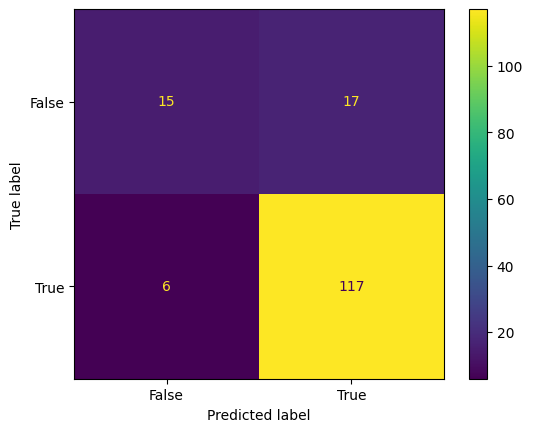

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = df, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
(15+117)/(15+17+6+117)

0.8516129032258064

In [ ]:
kflod = KFold(n_splits=5,shuffle=True)
test = cross_val_score(fit,x,y,cv = kflod,scoring='accuracy',n_jobs=-1)
print(np.mean(test)) 
#to see if data is accurate

0.8258064516129032


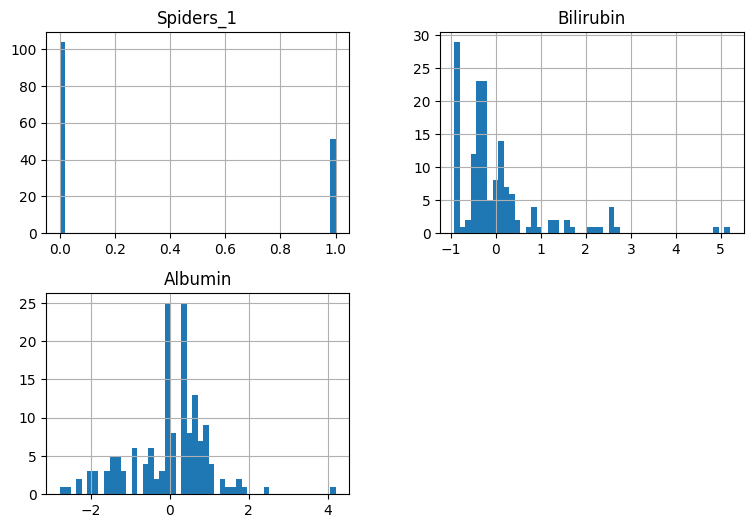

In [ ]:
x.hist(bins=50, figsize=(9,6))
plt.show()

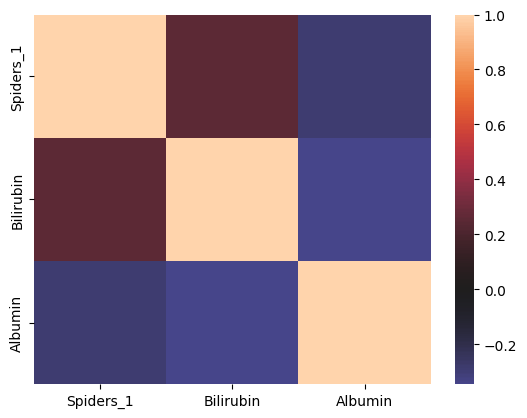

In [ ]:
sns.heatmap(x.corr(), center=0);
#to see colinearity